<a href="https://colab.research.google.com/github/shifanrasik/CatORDogCNN/blob/main/lab4mlom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
train_path='/content/drive/MyDrive/MLOM/LAB4/Training_data'
test_path='/content/drive/MyDrive/MLOM/LAB4/Testing_data'


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16,kernel_size=3, activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(filters=16,kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=64,kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=64,kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512,activation='relu'),

    tf.keras.layers.Dense(1,activation='sigmoid')

])

In [ ]:
#DATA preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_path,target_size=(300,300),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 633 images belonging to 2 classes.


In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

test_set=test_datagen.flow_from_directory(test_path,target_size=(300,300),
                                          batch_size=32,
                                          class_mode='binary')

Found 200 images belonging to 2 classes.


In [ ]:
#compile model
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#train model
history=model.fit(
    train_generator,
    steps_per_epoch=20,#633/32
    epochs=5,
    validation_data=test_set,
    validation_steps=7 #200/32

)

Epoch 1/5
20/20 [==============================] - 180s 9s/step - loss: 0.7049 - accuracy: 0.6051 - val_loss: 0.7048 - val_accuracy: 0.5000
Epoch 2/5
20/20 [==============================] - 50s 3s/step - loss: 0.6651 - accuracy: 0.6066 - val_loss: 0.6980 - val_accuracy: 0.5000
Epoch 3/5
20/20 [==============================] - 51s 3s/step - loss: 0.6662 - accuracy: 0.6066 - val_loss: 0.7057 - val_accuracy: 0.5000
Epoch 4/5
20/20 [==============================] - 49s 2s/step - loss: 0.6411 - accuracy: 0.6066 - val_loss: 0.7864 - val_accuracy: 0.5000
Epoch 5/5
20/20 [==============================] - 57s 3s/step - loss: 0.6313 - accuracy: 0.6351 - val_loss: 0.6702 - val_accuracy: 0.6050


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 32)        0

In [ ]:
model.save_weights('first_try.h5')

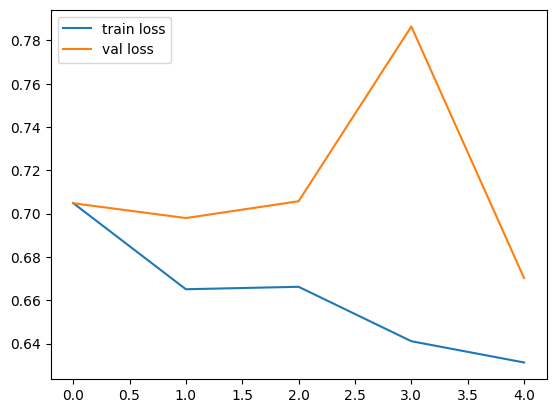

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
#plot the loss

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Accval_acc')

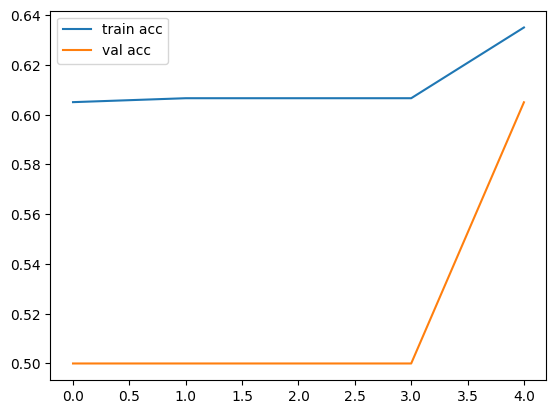

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('Accval_acc')